#**Nikki Leali and Natasha Mayorga**

Computational Foundations of AI

CAP 5625

Assignment 2

16 October, 2024

# Data Prep

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# path to connect to data
data = '/content/gdrive/My Drive/Credit_N400_p9.csv'
print(os.path.exists(data))

True


In [ ]:
# read the CSV
df = pd.read_csv(data, skipinitialspace=True) # note: we 'skipinitialspace=True' due to issues with white space when creating the design matrix
print(df.shape)
df.head()

(400, 10)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


# Algorithm 1 Implementation

In [ ]:
# learning rate (10^-5)
alpha = 10**-5

# iterations (10^5)
iterations = 10**5

In [ ]:
# generate N-dimensional response vector
y = df["Balance"].values

# center data
y_mean = np.mean(y)
y = y - y_mean
y = y.reshape(-1, 1)
print(y.shape)

(400, 1)


In [ ]:
# map binary categorical data to 0s and 1s with binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Student'] = df['Student'].map({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,1,0,1,333
1,106.025,6645,483,3,82,15,0,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,580
3,148.924,9504,681,3,36,11,0,0,0,964
4,55.882,4897,357,2,68,16,1,0,1,331


In [ ]:
# create the design matrix
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student','Married']]

# center and scale the data
X = (X - X.mean()) / X.std()

# get observations and features
N = X.shape[0]
p = X.shape[1]

print(X.shape)
X

(400, 9)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,-0.860505,-0.489386,-0.464957,-0.698255,-1.256101,-0.783948,1.034339,-0.332916,0.794400
1,1.725276,0.827225,0.827667,0.030993,1.526539,0.495967,-0.964384,2.996248,0.794400
2,1.684646,1.013518,1.028023,0.760241,0.888851,-0.783948,1.034339,-0.332916,-1.255665
3,2.942467,2.065853,2.107363,0.030993,-1.140158,-0.783948,-0.964384,-0.332916,-1.255665
4,0.302549,0.069925,0.013314,-0.698255,0.714936,0.815946,1.034339,-0.332916,0.794400
...,...,...,...,...,...,...,...,...,...
395,-0.939809,-0.275366,-0.309842,0.030993,-1.372044,-0.143990,1.034339,-0.332916,0.794400
396,-0.903832,-0.388875,-0.380936,1.489490,0.541021,1.135925,1.034339,-0.332916,-1.255665
397,0.359012,-0.244606,-0.219358,1.489490,0.656964,-0.463969,-0.964384,-0.332916,0.794400
398,-0.212542,-0.957716,-1.053100,-1.427504,-0.676384,-0.143990,1.034339,-0.332916,0.794400


In [ ]:
# check the standardizing
means = X.mean(axis=0)
variances = X.var(axis=0)

print("Means:\n", np.round(means,2))
print("\nVariances:\n", variances)

Means:
 Income      -0.0
Limit       -0.0
Rating       0.0
Cards       -0.0
Age          0.0
Education    0.0
Gender       0.0
Student      0.0
Married     -0.0
dtype: float64

Variances:
 Income       1.0
Limit        1.0
Rating       1.0
Cards        1.0
Age          1.0
Education    1.0
Gender       1.0
Student      1.0
Married      1.0
dtype: float64


In [ ]:
# define gradient descent function

def gradientDescent(X, y, alpha, lambd, iterations):
    # lambda: ridge regression penalty (regularization)
    # y_pred: X * beta
    # alpha: learning rate

    # initialize parameters
    beta = np.zeros((X.shape[1], 1))  # shape (p,1), initialize beta
    beta_history = np.zeros((iterations, X.shape[1]))  # track beta values

    # perform batch gradient descent
    for i in range(iterations):

        # predictions
          y_pred = np.dot(X, beta)  # shape (N, 1), predicted values

        # error
          error = y - y_pred  # shape (N, 1), actual - predicted values

        # update parameter vector beta according to mathematical formula
          beta = beta - (2 * alpha) * (lambd * beta - np.dot(X.T, (y - y_pred)))

        # save beta history
          beta_history[i, :] = beta.flatten()

    return beta_history, beta

# Deliverable 1

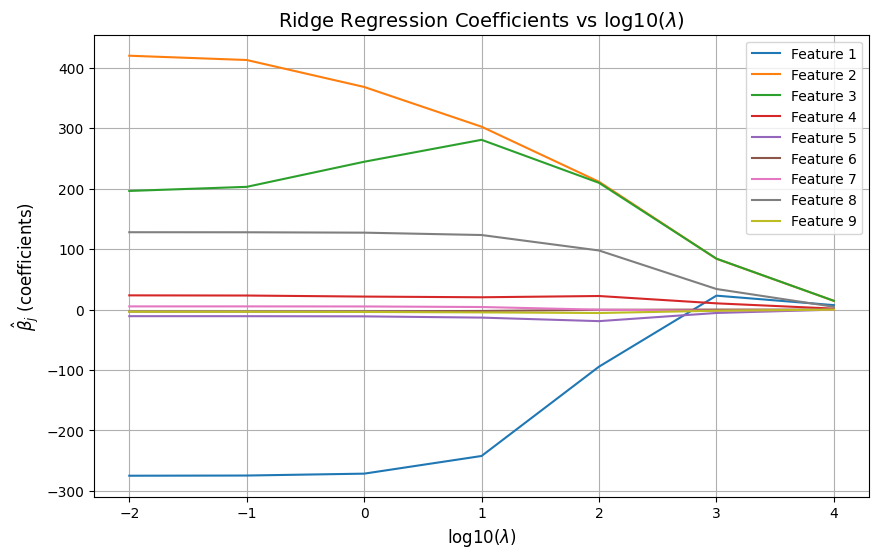

In [ ]:
# define range of lambda values (log-spaced)
lambdas = [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

# store beta coefficients per lambda
betas = []

# call gradient descent function across different lambdas
for lambd in lambdas:
    beta_history, beta = gradientDescent(X, y, alpha, lambd, iterations)
    betas.append(beta.flatten())  # get final beta

# make numpy array
betas = np.array(betas)

# plot coefficients for each feature vs log(lambda)
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(np.log10(lambdas), betas[:, i], label=f'Feature {i+1}')

# formatting
plt.xlabel(r'log10($\lambda$)', fontsize=12) #  # raw string for LaTeX printing lambda symbol
plt.ylabel(r'$\hat{\beta}_j$ (coefficients)', fontsize=12)
plt.title('Ridge Regression Coefficients vs log10($\lambda$)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()



# Deliverable 2

In [ ]:
# confirm X is a numpy array to avoid computation issues
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    print("converted")
else:
  print("not converted")

converted


In [ ]:
# set a random seed for reproducibility
np.random.seed(17)

In [ ]:
# k-fold (5) cross validation function

def cross_validation(X, y, alpha, lambd, iterations, k_folds=5):

    # split data into k folds
    N = X.shape[0]
    shuffled_indices = np.random.permutation(N)  # shuffle data indices (random seed set to 17 above)
    folds = np.array_split(shuffled_indices, k_folds)

    # store errors
    errors = []

    # iterate over each fold
    for i in range(k_folds):
        # get training and validation data
        test_idx = folds[i] # hold 1 fold for validation
        train_idx = np.concatenate([folds[j] for j in range(k_folds) if j != i]) # other 4 folds for training

        # index training and testing
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        # standardize data
        X_train = (X_train - X_train.mean()) / X_train.std()
        X_test = (X_test - X_train.mean()) / X_train.std()

        # call gradient descent on training set
        beta_history, beta = gradientDescent(X_train, y_train, alpha, lambd, iterations)

        # predict on validation set
        y_pred = np.dot(X_test, beta)

        # calculate mean squared error (MSE) on validation set
        error = np.mean((y_test - y_pred) ** 2)
        errors.append(error)

    # return average error across the k folds
    return np.mean(errors)


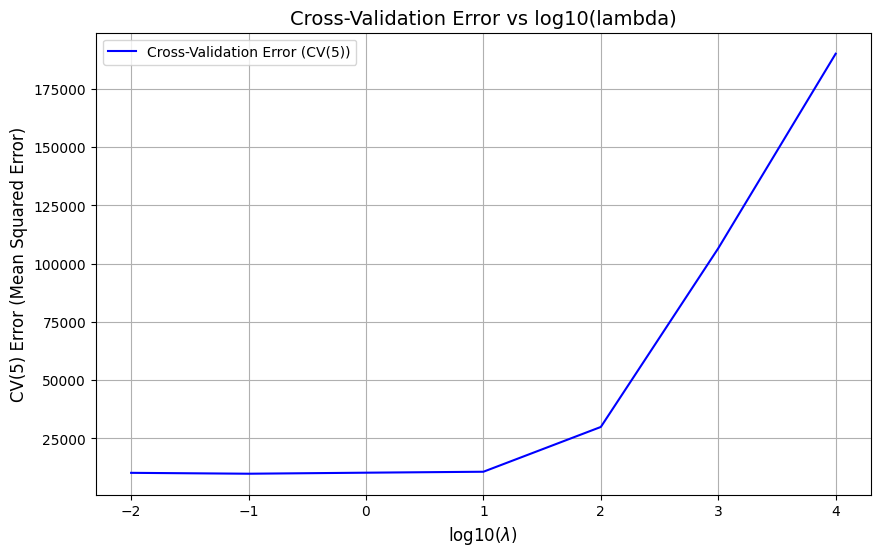

In [ ]:

# define a range of lambda values (log-spaced)
lambdas = [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

# store CV errors for each lambda
cv_errors = []

# iterate over lambdas and compute cross-validation error
for lambd in lambdas:
    cv_error = cross_validation(X, y, alpha, lambd, iterations, k_folds=5)
    cv_errors.append(cv_error)

# convert cv_errors to numpy array for easy plotting
cv_errors = np.array(cv_errors)

# plot cross-validation error vs log10(lambda)
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), cv_errors, label='Cross-Validation Error (CV(5))', color='b')

# formatting
plt.xlabel(r'log10($\lambda$)', fontsize=12) # raw string for LaTeX printing lambda symbol
plt.ylabel('CV(5) Error (Mean Squared Error)', fontsize=12)
plt.title('Cross-Validation Error vs log10(lambda)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Deliverable 3

In [ ]:
# find index of minimum cross-validation error
min_error_index = np.argmin(cv_errors)

# get lambda value at index
optimal_lambda = lambdas[min_error_index]

# print results
print(f"The optimal lambda (with the smallest CV(5) error) is: {optimal_lambda}")
print(f"The smallest CV(5) error is: {np.round(cv_errors[min_error_index], 4)}")

The optimal lambda (with the smallest CV(5) error) is: 0.1
The smallest CV(5) error is: 9893.0184


# Deliverable 4

In [ ]:
# call gradient descent function on optimal beta
optimal_beta_history, optimal_betas = gradientDescent(X, y, alpha, optimal_lambda, iterations)

# print the optimal beta values for each feature
print('Optimal Estimates of Best-Fit Parameters:\n')
for i in range(len(optimal_betas)):
    print(f'P{i+1}: {np.round(optimal_betas[i], 4)}')


Optimal Estimates of Best-Fit Parameters:

P1: [-274.6882]
P2: [412.9282]
P3: [203.036]
P4: [23.1839]
P5: [-11.0099]
P6: [-3.31]
P7: [5.1978]
P8: [127.863]
P9: [-3.6527]


# Deliverable 6 - Extra Credit

In [ ]:
# import the sklearn functions
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

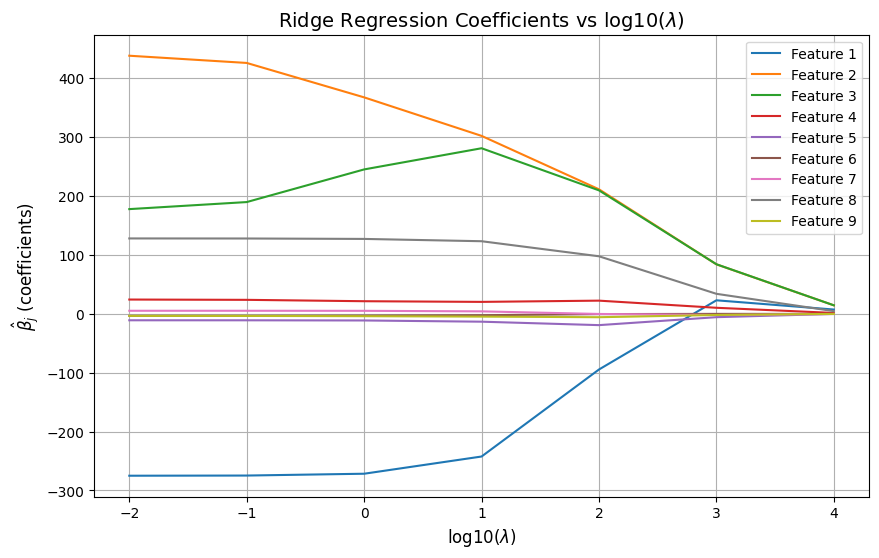

In [ ]:
# define range of lambda values (log-spaced)
lambdas = [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

# store beta coefficients per lambda
betas = []

for lambd in lambdas:
    ridge_model = Ridge(alpha=lambd, solver='saga', max_iter=iterations, fit_intercept=False)  # set alpha to lambda
    # the 'saga' solver is stochastic average gradient descent
    # in the Ridge model, "alpha" controls the regularization strength, acting at our "lambda"
    # "fit intercept" is set to false because we assume that the data is centered
    ridge_model.fit(X, y)
    betas.append(ridge_model.coef_.flatten())  # get final beta

# make numpy array
betas = np.array(betas)

# plot coefficients for each feature vs log(lambda)
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(np.log10(lambdas), betas[:, i], label=f'Feature {i+1}')

# formatting
plt.xlabel(r'log10($\lambda$)', fontsize=12) # raw string for LaTeX printing lambda symbol
plt.ylabel(r'$\hat{\beta}_j$ (coefficients)', fontsize=12)
plt.title('Ridge Regression Coefficients vs log10($\lambda$)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

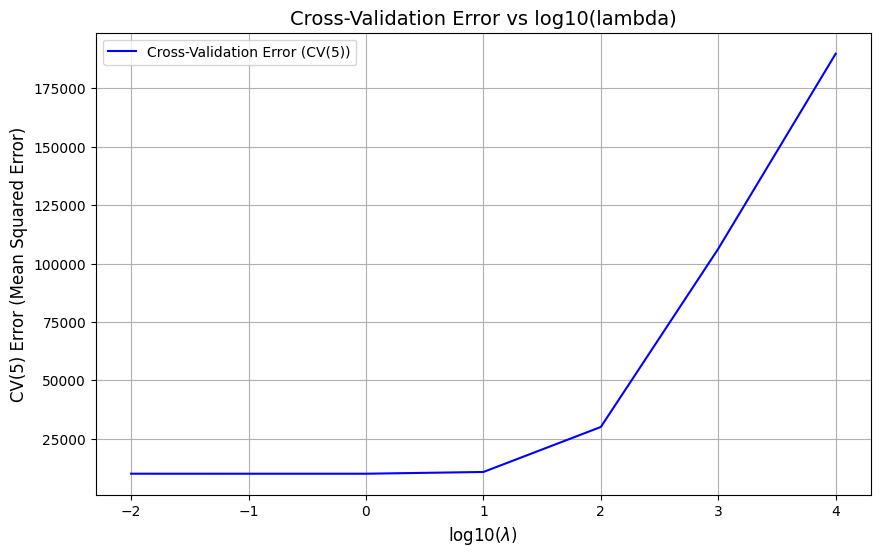

The optimal lambda (with the smallest CV(5) error) is: 0.1
The smallest CV(5) error is: 10041.733


In [ ]:
cv_errors = []

for lambd in lambdas:
    # call the sklearn ridge regression model
    ridge_model = Ridge(alpha=lambd, solver='saga', max_iter=iterations, fit_intercept=False)  # same parameters from above

    # 5-fold cross-validation for the mean squared error
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))  # convert to MSE with negative (scikit-learn uses defaults to negative MSE)

# convert cv_errors to numpy array for easy plotting
cv_errors = np.array(cv_errors)

# plot the cross-validation error vs log10(lambda)
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), cv_errors, label='Cross-Validation Error (CV(5))', color='b')

# formatting
plt.xlabel(r'log10($\lambda$)', fontsize=12)
plt.ylabel('CV(5) Error (Mean Squared Error)', fontsize=12)
plt.title('Cross-Validation Error vs log10(lambda)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# find lambda with smallest error
min_error_index = np.argmin(cv_errors)
optimal_lambda_sk = lambdas[min_error_index]
print(f"The optimal lambda (with the smallest CV(5) error) is: {optimal_lambda_sk}")
print(f"The smallest CV(5) error is: {np.round(cv_errors[min_error_index], 4)}")

In [ ]:
# train ridge model on optimal lambda
ridge_model = Ridge(alpha=optimal_lambda_sk, solver='saga', max_iter=iterations, fit_intercept=False)  # same parameters from above
ridge_model.fit(X, y)
optimal_betas_sk = (ridge_model.coef_.flatten())  # get final beta
print('Optimal Estimates of Best-Fit Parameters:\n')
for i in range(len(optimal_betas_sk)):
    print(f'P{i+1}: {np.round(optimal_betas_sk[i], 4)}')


Optimal Estimates of Best-Fit Parameters:

P1: -274.6577
P2: 426.0859
P3: 189.8304
P4: 23.7531
P5: -10.995
P6: -3.3785
P7: 5.197
P8: 127.9423
P9: -3.5621


In [85]:
# percent difference for the optimal betas
percent_diff = []

for i in range(len(optimal_betas)):
  abs_dif = abs(optimal_betas[i] - optimal_betas_sk[i])
  mean = (optimal_betas[i] + optimal_betas_sk[i])/2
  percent_diff.append(100*(abs_dif)/mean)

avg_percent_diff = np.mean(percent_diff)
print(np.round(avg_percent_diff, 4))

0.8509


Comparing both approaches to gradient decent with ridge regression (from scratch and using sklearn), we can make a few key observations:

**1. Both models return the optimal lambda as 10e-02 (0.1).**
  
  Both plots of log(λ)  vs. MSE appear to follow an exponentially increasing relationship. As such, the error is minimized when λ is smallest, and maximized as λ grows.

**2. Both approaches predict test labels with about the same accuracy.**
  
  The mean squared error associated with the optimized parameter values returned by our implementation from scratch was about 9893.01. The sklearn module returned a mean square error of about 10041.73. These are relatively similar error levels, with our scratch implementation being slightly more optimal. This may be because using sklearn's module, there is less opportunity to tune the parameters than in our custom function. For example, we use the pre-built "SAGA" (Stochastic Average Gradient Descent) solver which is slightly different from our gradient descent implementation.

**3. The optimized parameter values from both approaches are very similar.**

  This is evident by a visual comparison of both parameter values:

| Parameter |  Scratch  |  Sklearn  |
|:---------:|:---------:|:---------:|
|P1|-274.6882|-274.6577|
|P2|412.9282|426.0859|
|P3|203.036|189.8304|
|P4|23.1839|23.7531|
|P5|-11.0099|-10.995|
|P6|-3.31|-3.3785|
|P7|5.1978|5.197|
|P8|127.863|127.9423|
|P9|-3.6527|-3.5621|

Additionally, calculating the mean percent difference between both parameter lists returns about 0.85% (see calculation above).